In [ ]:
!pip install numpy
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn

In [ ]:
# Code
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import ParameterGrid

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
def build_model(optimizer='adam', lr=0.001):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Define parameter grid
param_grid = {
    'batch_size': [64, 128],
    'optimizer': ['adam', 'sgd'],
    'epochs': [5]
}

grid = list(ParameterGrid(param_grid))
results = []


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
<ipython-input-7-1397407035>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=labels, palette="pastel")


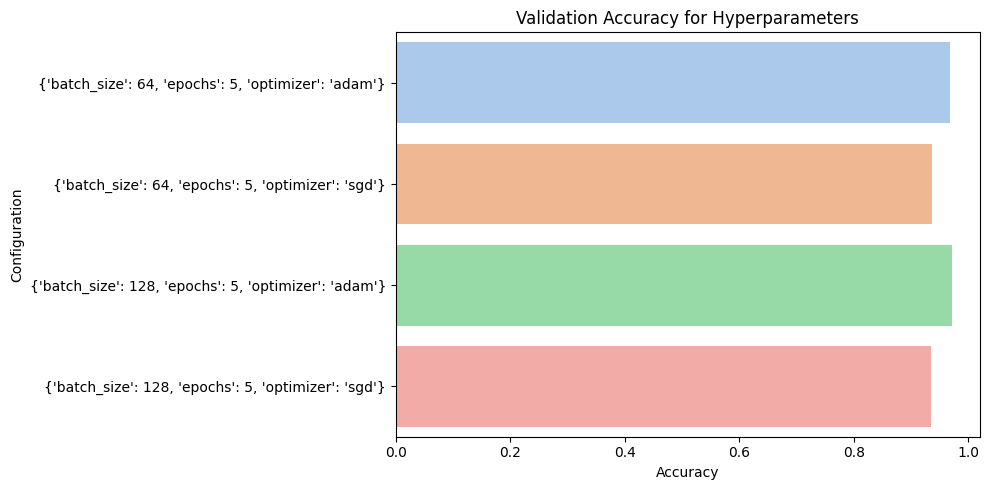

[({'batch_size': 64, 'epochs': 5, 'optimizer': 'adam'}, 0.9683333039283752), ({'batch_size': 64, 'epochs': 5, 'optimizer': 'sgd'}, 0.9366666674613953), ({'batch_size': 128, 'epochs': 5, 'optimizer': 'adam'}, 0.971666693687439), ({'batch_size': 128, 'epochs': 5, 'optimizer': 'sgd'}, 0.9350000023841858)]


In [ ]:
# Training and collecting results
for i, params in enumerate(grid):
    model = build_model(optimizer=params['optimizer'])
    history = model.fit(
        x_train, y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        verbose=0,
        validation_split=0.01
    )

    val_acc = history.history['val_accuracy'][-1]
    results.append((params, val_acc))

# Visualizing the results
import seaborn as sns

labels = [str(r[0]) for r in results]
scores = [r[1] for r in results]

plt.figure(figsize=(10, 5))
sns.barplot(x=scores, y=labels, palette="pastel")
plt.title("Validation Accuracy for Hyperparameters")
plt.xlabel("Accuracy")
plt.ylabel("Configuration")
plt.tight_layout()
plt.show()

print(results)
